In [1]:
import sys
import random
import math
import numpy as np
import sklearn
import pandas as pd

import os 
from os import listdir, walk
from os.path import isfile, join

import sys
import matplotlib.pyplot as plt

import tensorflow as tf
import seaborn as sns
sns.set_theme(style="darkgrid")

In [2]:
def encode_gait_percentage(df, name):
  percent = df[name].values.tolist()
  x = np.zeros((len(df[name]),1))
  y = np.zeros((len(df[name]),1))
  for i in range (len(percent)): 
    phi = percent[i] * 2 * math.pi / 100
    x[i] = math.cos(phi)
    y[i] = math.sin(phi)
    
  df['x'] = x
  df['y'] = y

In [3]:
def isclose(a, b, rel_tol=1e-2, abs_tol=0):
    return abs(a-b) <= max(rel_tol * max(abs(a), abs(b)), abs_tol)

In [4]:
def shuffle_cycle(all_data):
    all_data.info()
    cycle = 0
    cycle_list = []

    start = 0

    for i in range(len(all_data) - 1):
        if (all_data['perc'][i+1] == 0):
            cycle += 1
            cycle_list.append(all_data.iloc[start:i])
            start = i + 1
    
    #random.shuffle(cycle_list)
    source_table = pd.concat(cycle_list, axis=0, ignore_index=True)

    drop_list = ["lgrf","rgrf","l_ph_ank","r_ph_ank"]
    source_table = source_table.drop(drop_list, axis = 1)

    encode_gait_percentage(source_table, 'perc')

    return source_table
    

In [5]:
def calculate_avg(df, feature):
    x = []
    y = []
    
    sum = 0.0
    elem = 1
    current = 0.0
    previous = current
    
    for i in range (len(df['perc'])):
        current = df['perc'][i]
        
        if (~isclose(previous, current)):
            avg = sum / elem
            sum = 0.0
            elem = 1
            x.append(previous)
            previous = current
            y.append(avg)
            avg = 0
        
        sum = sum + df[feature][i]            
        elem = elem + 1
        #previous = current
        #print(df['perc'][i])
    
    return x,y

In [6]:
working_dir = os.getcwd()
sys_platform = sys.platform
excel_path_dict = {'linux' : "/csvs/", 'win32' : "\Data\Incline\\non-normal\\all subject\\", 'darwin' : "/Data/Incline/all subject/"}
excel_path_name = excel_path_dict[sys_platform]

directory_path = working_dir
excel_path = directory_path + excel_path_name

In [7]:
excel_path

'/Users/hikikomori/lab/Gait_Phase_Prediction/Data/Incline/all subject/'

In [60]:
yc_path = excel_path + 'VP_I_0_new_.xlsx'
ak_path = excel_path + 'SKS_0_I_new_.xlsx'

In [61]:
yc = pd.read_excel(yc_path, sheet_name="Sheet1")
ak = pd.read_excel(ak_path, sheet_name="Sheet1")

In [62]:
#yc.info()

In [63]:
#ak.info()

In [64]:
encode_gait_percentage(yc, 'perc')

In [65]:
yc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45086 entries, 0 to 45085
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lcop          45086 non-null  float64
 1   rcop          45086 non-null  float64
 2   l_ph_ank      45086 non-null  float64
 3   l_ph_hip      45086 non-null  float64
 4   l_ph_fo       45086 non-null  float64
 5   r_ph_ank      45086 non-null  float64
 6   r_ph_hip      45086 non-null  float64
 7   r_ph_fo       45086 non-null  float64
 8   lgrf          45086 non-null  float64
 9   rgrf          45086 non-null  float64
 10  st_sw_phase   45086 non-null  int64  
 11  strike_frame  45086 non-null  int64  
 12  perc          45086 non-null  float64
 13  lhip_ang      45086 non-null  float64
 14  rhip_ang      45086 non-null  float64
 15  st_l          45086 non-null  float64
 16  x             45086 non-null  float64
 17  y             45086 non-null  float64
dtypes: float64(16), int64(2)
m

In [66]:
encode_gait_percentage(ak, 'perc')

In [67]:
ak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59433 entries, 0 to 59432
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lcop          59433 non-null  float64
 1   rcop          59433 non-null  float64
 2   l_ph_ank      59433 non-null  float64
 3   l_ph_hip      59433 non-null  float64
 4   l_ph_fo       59433 non-null  float64
 5   r_ph_ank      59433 non-null  float64
 6   r_ph_hip      59433 non-null  float64
 7   r_ph_fo       59433 non-null  float64
 8   lgrf          59433 non-null  float64
 9   rgrf          59433 non-null  float64
 10  st_sw_phase   59433 non-null  int64  
 11  strike_frame  59433 non-null  int64  
 12  perc          59433 non-null  float64
 13  lhip_ang      59433 non-null  float64
 14  rhip_ang      59433 non-null  float64
 15  st_l          59433 non-null  float64
 16  x             59433 non-null  float64
 17  y             59433 non-null  float64
dtypes: float64(16), int64(2)
m

In [68]:
ak_perc = ak['perc']
yc_perc = yc['perc']

feature = 'lcop'
degree = '0'

ak_lcop = ak[feature]
yc_lcop = yc[feature]

In [69]:
ak_sorted = ak.sort_values(by='perc', ignore_index='true')
yc_sorted = yc.sort_values(by='perc', ignore_index='true')

In [70]:
ak_sorted

,lcop,rcop,l_ph_ank,l_ph_hip,l_ph_fo,r_ph_ank,r_ph_hip,r_ph_fo,lgrf,rgrf,st_sw_phase,strike_frame,perc,lhip_ang,rhip_ang,st_l,x,y
0,0.000122,0.003343,280.415731,353.910561,254.766078,266.135053,215.667273,266.999134,0.073195,1.738675,84,1,0.0,26.845115,-14.511416,0.922459,1.0,0.000000e+00
1,0.000103,0.003302,280.567261,348.221565,257.602296,267.879150,204.404460,269.962149,0.067948,1.871673,72,1,0.0,27.897060,-13.913764,0.964314,1.0,0.000000e+00
2,0.000085,0.003253,280.836807,352.260708,259.130991,267.329449,211.576659,265.874064,0.041264,1.876782,74,1,0.0,27.344520,-15.859300,0.951085,1.0,0.000000e+00
3,0.000104,0.003332,279.429043,338.817752,255.643886,269.586371,211.888153,272.608988,0.040947,1.716127,96,1,0.0,25.122585,-12.723688,0.866105,1.0,0.000000e+00
4,0.000205,0.003342,281.099258,340.745244,257.546654,272.404522,233.136126,275.824360,0.066126,1.781619,108,1,0.0,25.562639,-12.293544,0.922881,1.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59428,0.000067,0.003360,284.686081,0.904600,257.814830,268.428280,226.970121,269.277697,0.043235,1.891314,65,183,100.0,27.895040,-13.943748,0.970258,1.0,1.531427e-15
59429,0.000137,0.003317,284.665745,6.508958,257.251427,269.619229,233.787955,271.694384,0.052963,1.798755,66,184,100.0,29.480683,-13.214636,1.013694,1.0,1.531427e-15
59430,0.000117,0.003415,283.864356,357.274179,257.869411,270.565653,214.087479,278.450279,0.063671,1.825959,68,184,100.0,26.336631,-12.117559,0.925482,1.0,1.531427e-15
59431,0.000111,0.003293,281.993681,342.582882,254.478309,268.735307,192.070208,271.514697,0.057522,1.911639,65,184,100.0,28.201236,-13.365170,0.989830,1.0,1.531427e-15


In [71]:
x, y = calculate_avg(ak_sorted, feature)
x2, y2 = calculate_avg(yc_sorted, feature)

Text(0.5, 0, 'perc')

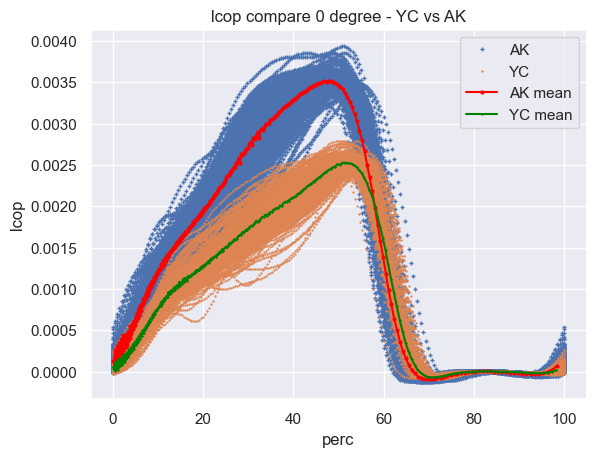

In [72]:
plt.plot(ak_perc[0:], ak_lcop[0:], label='AK', marker='+', markersize='2.5', linestyle='None')
plt.plot(yc_perc[0:], yc_lcop[0:], label='YC', marker='.', markersize='1.3', linestyle='None')
plt.plot(x, y, color='red', label='AK mean', marker='o', markersize ='2')
plt.plot(x2, y2, color='green', label='YC mean', marker='x', markersize='1')
plt.legend()
plt.title(feature + ' compare ' + degree + ' degree - YC vs AK')
plt.ylabel(feature)
plt.xlabel('perc') 

In [73]:
type(ak['perc'])

pandas.core.series.Series